In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification, load_breast_cancer, fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, StackingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score,roc_auc_score, confusion_matrix,classification_report, mean_absolute_error, roc_curve, precision_recall_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor

In [5]:
# Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Bagging Classifier with Decision Trees
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.89


In [8]:
# Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bagging Regressor with Decision Tree as base estimator
bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,  # Number of trees
    random_state=42
)

# Train the model
bagging_regressor.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_regressor.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.2573


In [10]:
# Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data.feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print(feature_importance_df)

                    Feature  Importance
23               worst area    0.153892
27     worst concave points    0.144663
7       mean concave points    0.106210
20             worst radius    0.077987
6            mean concavity    0.068001
22          worst perimeter    0.067115
2            mean perimeter    0.053270
0               mean radius    0.048703
3                 mean area    0.047555
26          worst concavity    0.031802
13               area error    0.022407
21            worst texture    0.021749
25        worst compactness    0.020266
10             radius error    0.020139
5          mean compactness    0.013944
1              mean texture    0.013591
12          perimeter error    0.011303
24         worst smoothness    0.010644
28           worst symmetry    0.010120
16          concavity error    0.009386
4           mean smoothness    0.007285
19  fractal dimension error    0.005321
15        compactness error    0.005253
29  worst fractal dimension    0.005210


In [12]:
# Train a Random Forest Regressor and compare its performance with a single Decision Tree.
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Decision Tree - MSE: 0.4952, R2 Score: 0.6221
Random Forest - MSE: 0.2554, R2 Score: 0.8051


In [14]:
# Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data (not needed for OOB score but useful for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest with OOB score enabled
clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, bootstrap=True)
clf.fit(X_train, y_train)

# Get OOB Score
print(f"OOB Score: {clf.oob_score_:.4f}")

OOB Score: 0.9167


In [17]:
# Train a Bagging Classifier using SVM as a base estimator and print accuracy.
# Load dataset
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with SVM as base estimator
bagging_clf = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 1.0000


Random Forest with 1 trees - Accuracy: 1.0000
Random Forest with 5 trees - Accuracy: 0.9667
Random Forest with 10 trees - Accuracy: 1.0000
Random Forest with 50 trees - Accuracy: 1.0000
Random Forest with 100 trees - Accuracy: 1.0000
Random Forest with 200 trees - Accuracy: 1.0000
Random Forest with 500 trees - Accuracy: 1.0000


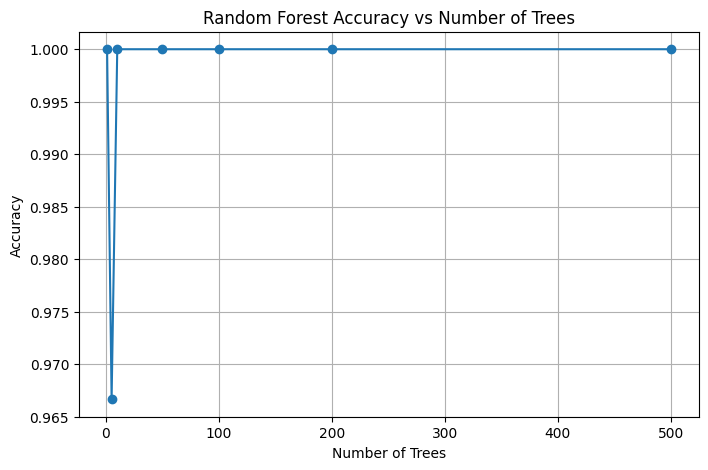

In [20]:
# Train a Random Forest Classifier with different numbers of trees and compare accuracy.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different numbers of trees to test
n_estimators_list = [1, 5, 10, 50, 100, 200, 500]
accuracies = []

# Train and evaluate models
for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Random Forest with {n} trees - Accuracy: {acc:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.grid(True)
plt.show()

In [22]:
# Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
# Load dataset (binary classification)
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Bagging Classifier with Logistic Regression as base estimator
bagging_clf = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict probabilities for AUC calculation
y_prob = bagging_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"Bagging Classifier AUC Score: {auc_score:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Classifier AUC Score: 0.9977


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


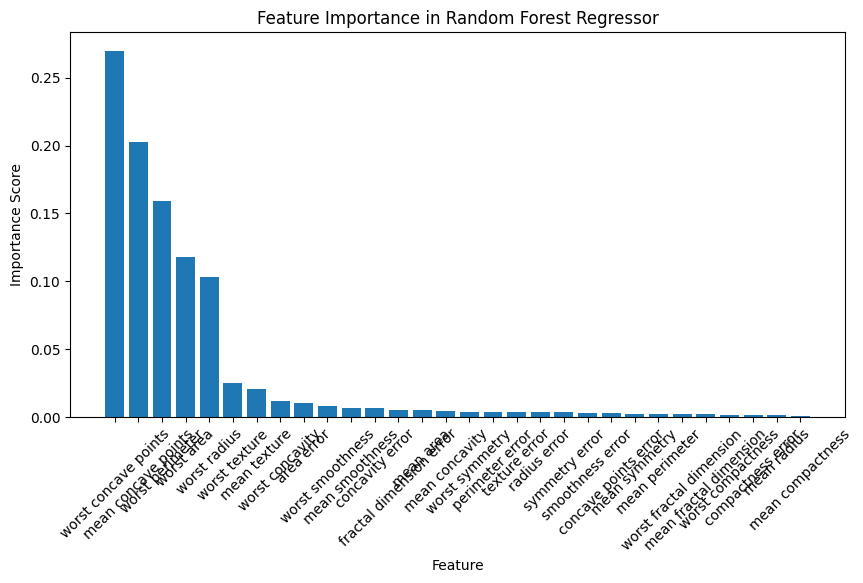

worst concave points: 0.2699
mean concave points: 0.2028
worst perimeter: 0.1589
worst area: 0.1182
worst radius: 0.1035
worst texture: 0.0255
mean texture: 0.0211
worst concavity: 0.0118
area error: 0.0102
worst smoothness: 0.0085
mean smoothness: 0.0067
concavity error: 0.0066
fractal dimension error: 0.0053
mean area: 0.0051
mean concavity: 0.0047
worst symmetry: 0.0042
perimeter error: 0.0039
texture error: 0.0038
radius error: 0.0037
symmetry error: 0.0035
smoothness error: 0.0035
concave points error: 0.0033
mean symmetry: 0.0027
mean perimeter: 0.0025
worst fractal dimension: 0.0024
mean fractal dimension: 0.0021
worst compactness: 0.0018
compactness error: 0.0017
mean radius: 0.0014
mean compactness: 0.0008


In [28]:
#  Train a Random Forest Regressor and analyze feature importance scores.
X, y = data.data, data.target
feature_names = data.feature_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Get feature importance scores
feature_importance = rf_regressor.feature_importances_

# Sort feature importance scores in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance in Random Forest Regressor")
plt.show()

# Print feature importance scores
for i, idx in enumerate(sorted_idx):
    print(f"{feature_names[idx]}: {feature_importance[idx]:.4f}")

In [29]:
# Train an ensemble model using both Bagging and Random Forest and compare accuracy.
# Load dataset (Iris dataset for classification)
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bagging Classifier with Decision Tree as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Print Accuracy Scores
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

# Compare results
if rf_accuracy > bagging_accuracy:
    print("Random Forest performs better!")
elif rf_accuracy < bagging_accuracy:
    print("Bagging Classifier performs better!")
else:
    print("Both models have the same accuracy!")

Bagging Classifier Accuracy: 1.0000
Random Forest Classifier Accuracy: 1.0000
Both models have the same accuracy!


In [31]:
# Train a Random Forest Classifier and tune hyperparameters using GridSearchCV=
from sklearn.model_selection import GridSearchCV
# Load dataset (Iris dataset for classification)
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required at a leaf node
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Train model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print(f"Best Hyperparameters: {best_params}")
print(f"Best Model Accuracy: {accuracy:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Accuracy: 1.0000


Bagging Regressor with 1 estimators - MSE: 0.5501
Bagging Regressor with 5 estimators - MSE: 0.3060
Bagging Regressor with 10 estimators - MSE: 0.2824
Bagging Regressor with 50 estimators - MSE: 0.2573
Bagging Regressor with 100 estimators - MSE: 0.2559
Bagging Regressor with 200 estimators - MSE: 0.2541


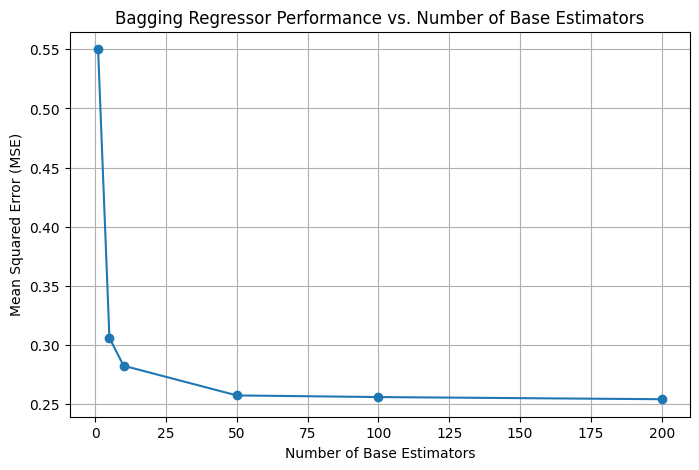

In [33]:
# Train a Bagging Regressor with different numbers of base estimators and compare performance.
# Load dataset (California Housing)
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different numbers of base estimators to compare
n_estimators_list = [1, 5, 10, 50, 100, 200]
mse_scores = []

# Train and evaluate models
for n in n_estimators_list:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Bagging Regressor with {n} estimators - MSE: {mse:.4f}")

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mse_scores, marker='o', linestyle='-')
plt.xlabel("Number of Base Estimators")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor Performance vs. Number of Base Estimators")
plt.grid(True)
plt.show()

Model Accuracy: 1.0000

Misclassified Samples:
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), True Label, Predicted Label]
Index: []


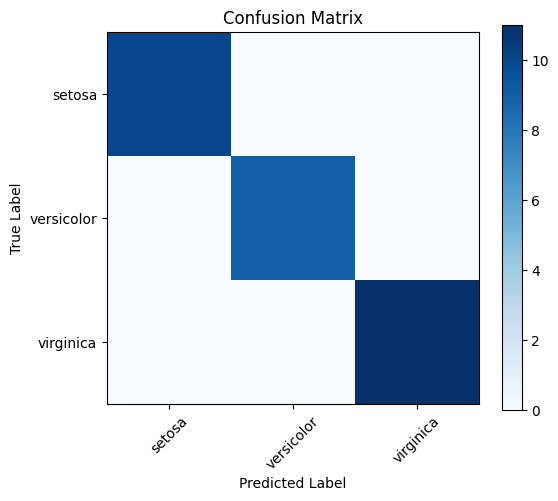

In [35]:
# Train a Random Forest Classifier and analyze misclassified samples.
# Load dataset (Iris dataset for classification)
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Identify misclassified samples
misclassified_idx = np.where(y_pred != y_test)[0]
misclassified_samples = X_test[misclassified_idx]
misclassified_true_labels = y_test[misclassified_idx]
misclassified_pred_labels = y_pred[misclassified_idx]

# Convert misclassified samples into a DataFrame
misclassified_df = pd.DataFrame(misclassified_samples, columns=feature_names)
misclassified_df['True Label'] = [class_names[label] for label in misclassified_true_labels]
misclassified_df['Predicted Label'] = [class_names[label] for label in misclassified_pred_labels]

print("\nMisclassified Samples:")
print(misclassified_df)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names)), labels=class_names)
plt.title("Confusion Matrix")
plt.show()

In [37]:
# Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Train a Bagging Classifier with Decision Trees as base estimators
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_preds = bagging.predict(X_test)

bagging_accuracy = accuracy_score(y_test, bagging_preds)
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

# Compare performance
if bagging_accuracy > dt_accuracy:
    print("Bagging Classifier performs better than a single Decision Tree.")
elif bagging_accuracy < dt_accuracy:
    print("Decision Tree performs better than Bagging Classifier.")
else:
    print("Both models have similar performance.")

Decision Tree Accuracy: 0.8567
Bagging Classifier Accuracy: 0.8700
Bagging Classifier performs better than a single Decision Tree.


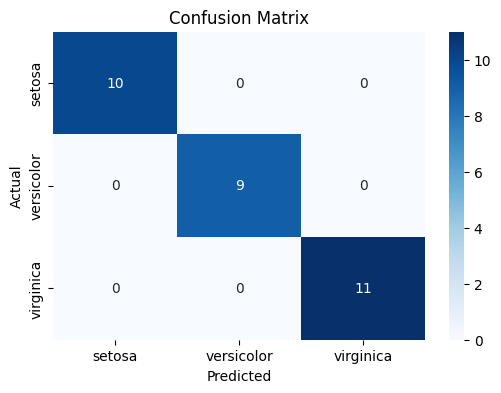

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [39]:
# Train a Random Forest Classifier and visualize the confusion matrix.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=data.target_names))

Decision Tree Accuracy: 1.0000
SVM Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Stacking Classifier Accuracy: 1.0000


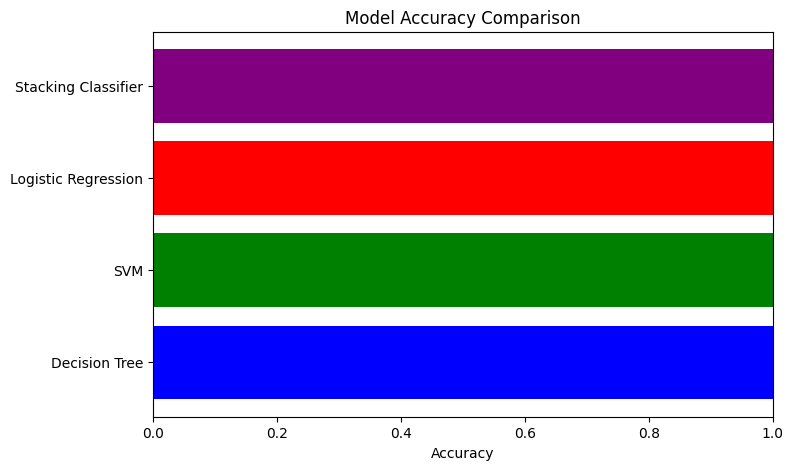

In [41]:
# Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVM requires probability=True for stacking
lr = LogisticRegression(max_iter=200, random_state=42)

# Define Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('dt', dt), ('svm', svm), ('lr', lr)],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)

# Train and evaluate models
models = {
    "Decision Tree": dt,
    "SVM": svm,
    "Logistic Regression": lr,
    "Stacking Classifier": stacking_clf
}

# Store accuracy results
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Plot comparison
plt.figure(figsize=(8,5))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.show()

Top 5 Most Important Features:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


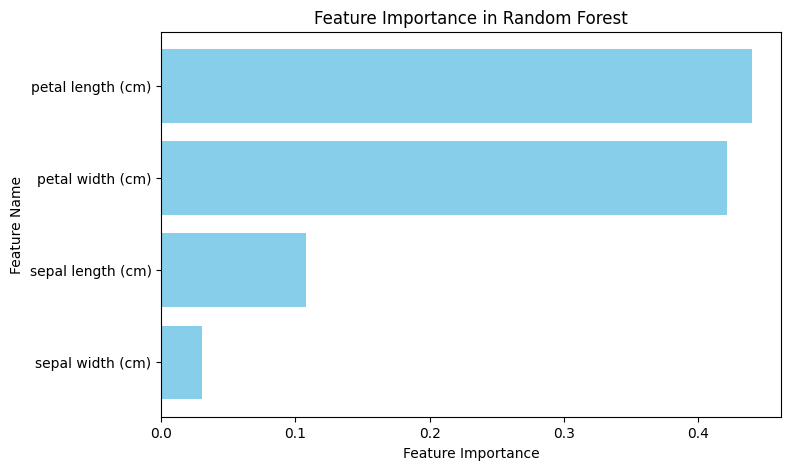

In [42]:
# Train a Random Forest Classifier and print the top 5 most important features.
# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print top 5 important features
print("Top 5 Most Important Features:")
print(feature_df.head(5))

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



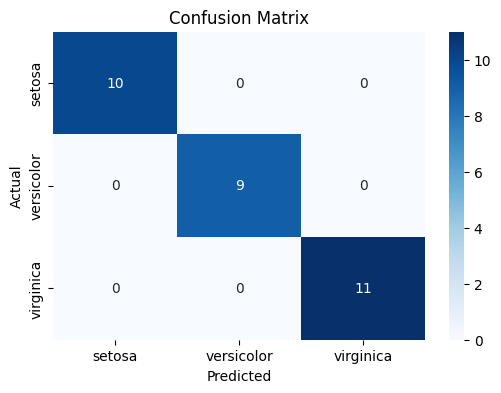

In [44]:
# Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Classifier using Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_clf.predict(X_test)

# Compute and print classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

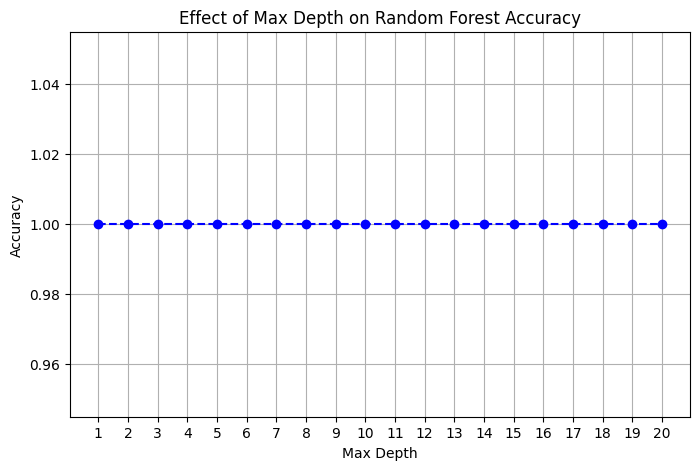

In [45]:
# Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Analyze accuracy for different max_depth values
max_depth_values = range(1, 21)  # Trying different max_depth values
accuracies = []

for depth in max_depth_values:
    clf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of Max Depth on Random Forest Accuracy")
plt.xticks(max_depth_values)
plt.grid(True)
plt.show()

Performance Comparison:
Bagging with Decision Tree -> MAE: 0.3300, R² Score: 0.8036
Bagging with KNN -> MAE: 0.7996, R² Score: 0.1787


<ipython-input-47-095cd07bc8fb>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=mae_values, palette="Blues")
<ipython-input-47-095cd07bc8fb>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=r2_values, palette="Greens")


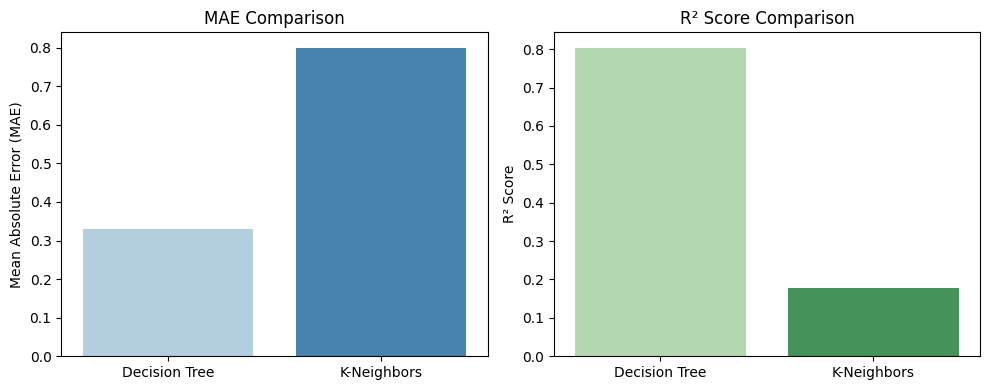

In [47]:
# Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

# Train Bagging Regressors
bagging_dt = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)
bagging_knn = BaggingRegressor(estimator=knn_regressor, n_estimators=50, random_state=42)

bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

# Make predictions
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Evaluate performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print results
print("Performance Comparison:")
print(f"Bagging with Decision Tree -> MAE: {mae_dt:.4f}, R² Score: {r2_dt:.4f}")
print(f"Bagging with KNN -> MAE: {mae_knn:.4f}, R² Score: {r2_knn:.4f}")

# Visualization
labels = ["Decision Tree", "K-Neighbors"]
mae_values = [mae_dt, mae_knn]
r2_values = [r2_dt, r2_knn]

plt.figure(figsize=(10, 4))

# MAE Plot
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=mae_values, palette="Blues")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Comparison")

# R² Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=r2_values, palette="Greens")
plt.ylabel("R² Score")
plt.title("R² Score Comparison")

plt.tight_layout()
plt.show()

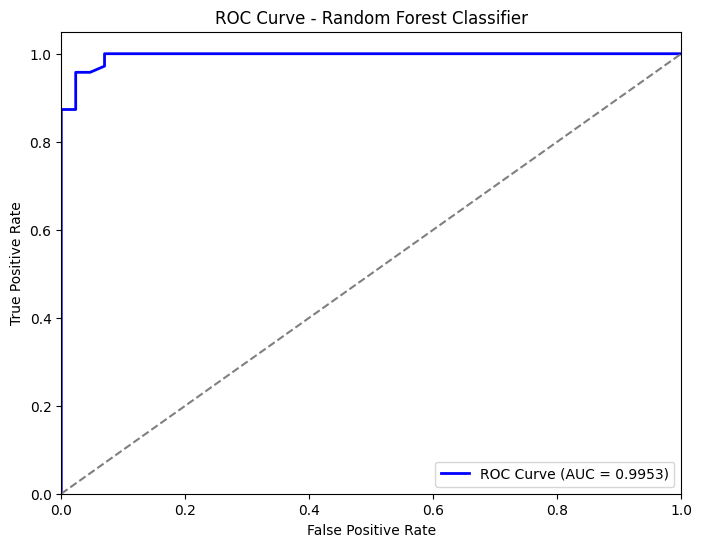

ROC-AUC Score: 0.9953


In [49]:
# Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_probs = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC Curve and AUC Score
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Print AUC Score
print(f"ROC-AUC Score: {roc_auc:.4f}")

In [51]:
# Train a Bagging Classifier and evaluate its performance using cross-validatio.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_clf, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

Cross-validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9667
Standard Deviation: 0.0211


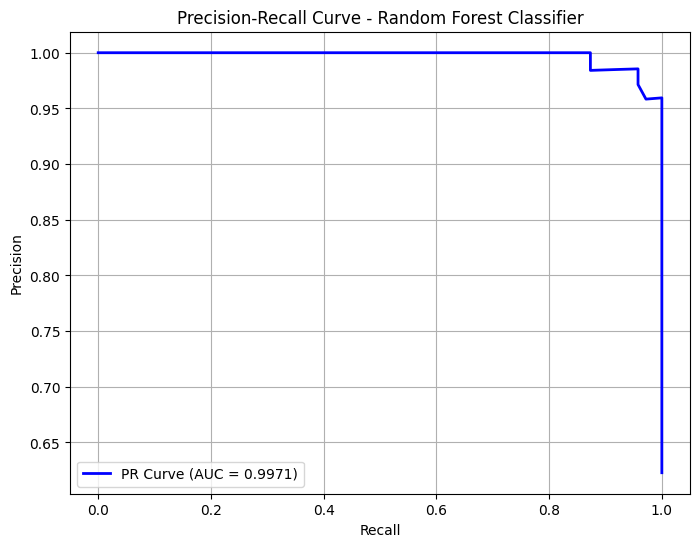

Precision-Recall AUC Score: 0.9971


In [53]:
# Train a Random Forest Classifier and plot the Precision-Recall curv.
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]  # Probability estimates for class 1

# Compute Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Compute AUC for Precision-Recall Curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest Classifier")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# Print AUC-PR Score
print(f"Precision-Recall AUC Score: {pr_auc:.4f}")

In [54]:
# Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(max_iter=200)

# Train and evaluate individual models
rf_clf.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_pred_log = log_reg.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_log = accuracy_score(y_test, y_pred_log)

# Define and train Stacking Classifier
stack_clf = StackingClassifier(estimators=[('rf', rf_clf), ('log_reg', log_reg)], final_estimator=LogisticRegression())
stack_clf.fit(X_train, y_train)

# Predict and evaluate Stacking Classifier
y_pred_stack = stack_clf.predict(X_test)
acc_stack = accuracy_score(y_test, y_pred_stack)

# Print accuracy results
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Stacking Classifier Accuracy: {acc_stack:.4f}")

Random Forest Accuracy: 1.0000
Logistic Regression Accuracy: 1.0000
Stacking Classifier Accuracy: 1.0000


Bootstrap Sample: 50% -> MAE: 0.3394, R²: 0.7967
Bootstrap Sample: 70% -> MAE: 0.3325, R²: 0.7987
Bootstrap Sample: 100% -> MAE: 0.3300, R²: 0.8036


<ipython-input-55-5475fda08040>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bootstrap_samples, y=mae_scores, palette="Blues")
<ipython-input-55-5475fda08040>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bootstrap_samples, y=r2_scores, palette="Greens")


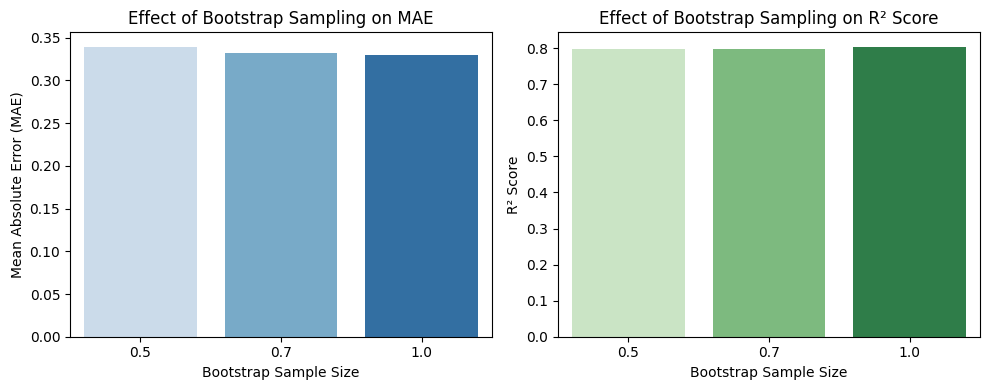

In [55]:
# Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define bootstrap sample sizes
bootstrap_samples = [0.5, 0.7, 1.0]  # 50%, 70%, 100% of training data

# Store results
mae_scores = []
r2_scores = []

# Train and evaluate Bagging Regressors with different bootstrap sizes
for sample_size in bootstrap_samples:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=sample_size,
        random_state=42
    )

    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mae_scores.append(mae)
    r2_scores.append(r2)

    print(f"Bootstrap Sample: {sample_size * 100:.0f}% -> MAE: {mae:.4f}, R²: {r2:.4f}")

# Visualization
plt.figure(figsize=(10, 4))

# MAE Plot
plt.subplot(1, 2, 1)
sns.barplot(x=bootstrap_samples, y=mae_scores, palette="Blues")
plt.xlabel("Bootstrap Sample Size")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Effect of Bootstrap Sampling on MAE")

# R² Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x=bootstrap_samples, y=r2_scores, palette="Greens")
plt.xlabel("Bootstrap Sample Size")
plt.ylabel("R² Score")
plt.title("Effect of Bootstrap Sampling on R² Score")

plt.tight_layout()
plt.show()